# Data inputs and Display Libraries



In [ ]:

import pandas as pd
import numpy as np
import pickle

pd.set_option('display.float_format', lambda x: '%.5f' % x)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


# Data Preprocessing Libraries

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder


# Feature Selection & Modelling Libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.tree import DecisionTreeClassifier
import pickle
from sklearn.model_selection import GridSearchCV

# Metrics Libraries

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve


### Model Building

In [ ]:

from sklearn import tree

In [ ]:
fl_out = "../datasets"
def pick_in(obj_name):
    fl_out1 = fl_out + "/" + obj_name
    pickle_in = open(fl_out1,"rb")
    mod1= pickle.load(pickle_in)
    
    return mod1

In [ ]:
list_objs = ["df_all_train2","y_train1","df_all_test2","y_test1","sel_cols"]

for i in list_objs:
     globals()[i]= pick_in(i)

In [ ]:
df_all_train2.shape

(187600, 245)

In [ ]:
df_all_train2[0:10,-6:].astype('int')

array([[      1, 7175181,      27,       3,       3,      10],
       [      0, 7601827,      30,       5,       5,      12],
       [      0, 9483434,      26,       2,       2,      14],
       [      0, 3211177,      30,       3,       3,      10],
       [      0, 8211851,      25,       2,       2,      10],
       [      0, 8737618,      25,       0,       0,      10],
       [      0, 6109577,      26,       1,       1,      10],
       [      0, 3354152,      26,       6,       6,      12],
       [      1, 5471719,      26,       2,       2,      10],
       [      0, 8243953,      28,       1,       1,      14]])

# Building Model

In [ ]:
##back to presentation

# Measure

In [ ]:
def auc1_scr(mod1,test_set,actual1):
    mod = eval(mod1)
    pred1=mod.predict_proba(test_set)[:,1]
    fpr, tpr, thresholds = roc_curve(actual1, pred1)
    auc1 = auc(fpr, tpr)
    
    return auc1

In [ ]:
####Single Decision Tree

In [ ]:
DT = DecisionTreeClassifier(random_state=0,max_depth=2)
DT.fit(df_all_train2,y_train1)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [ ]:
auc1_te = auc1_scr("DT",df_all_test2,y_test1)
auc1_tr = auc1_scr("DT",df_all_train2,y_train1)

In [ ]:
auc1_te,auc1_tr

(0.5269550745170777, 0.5269921464088778)

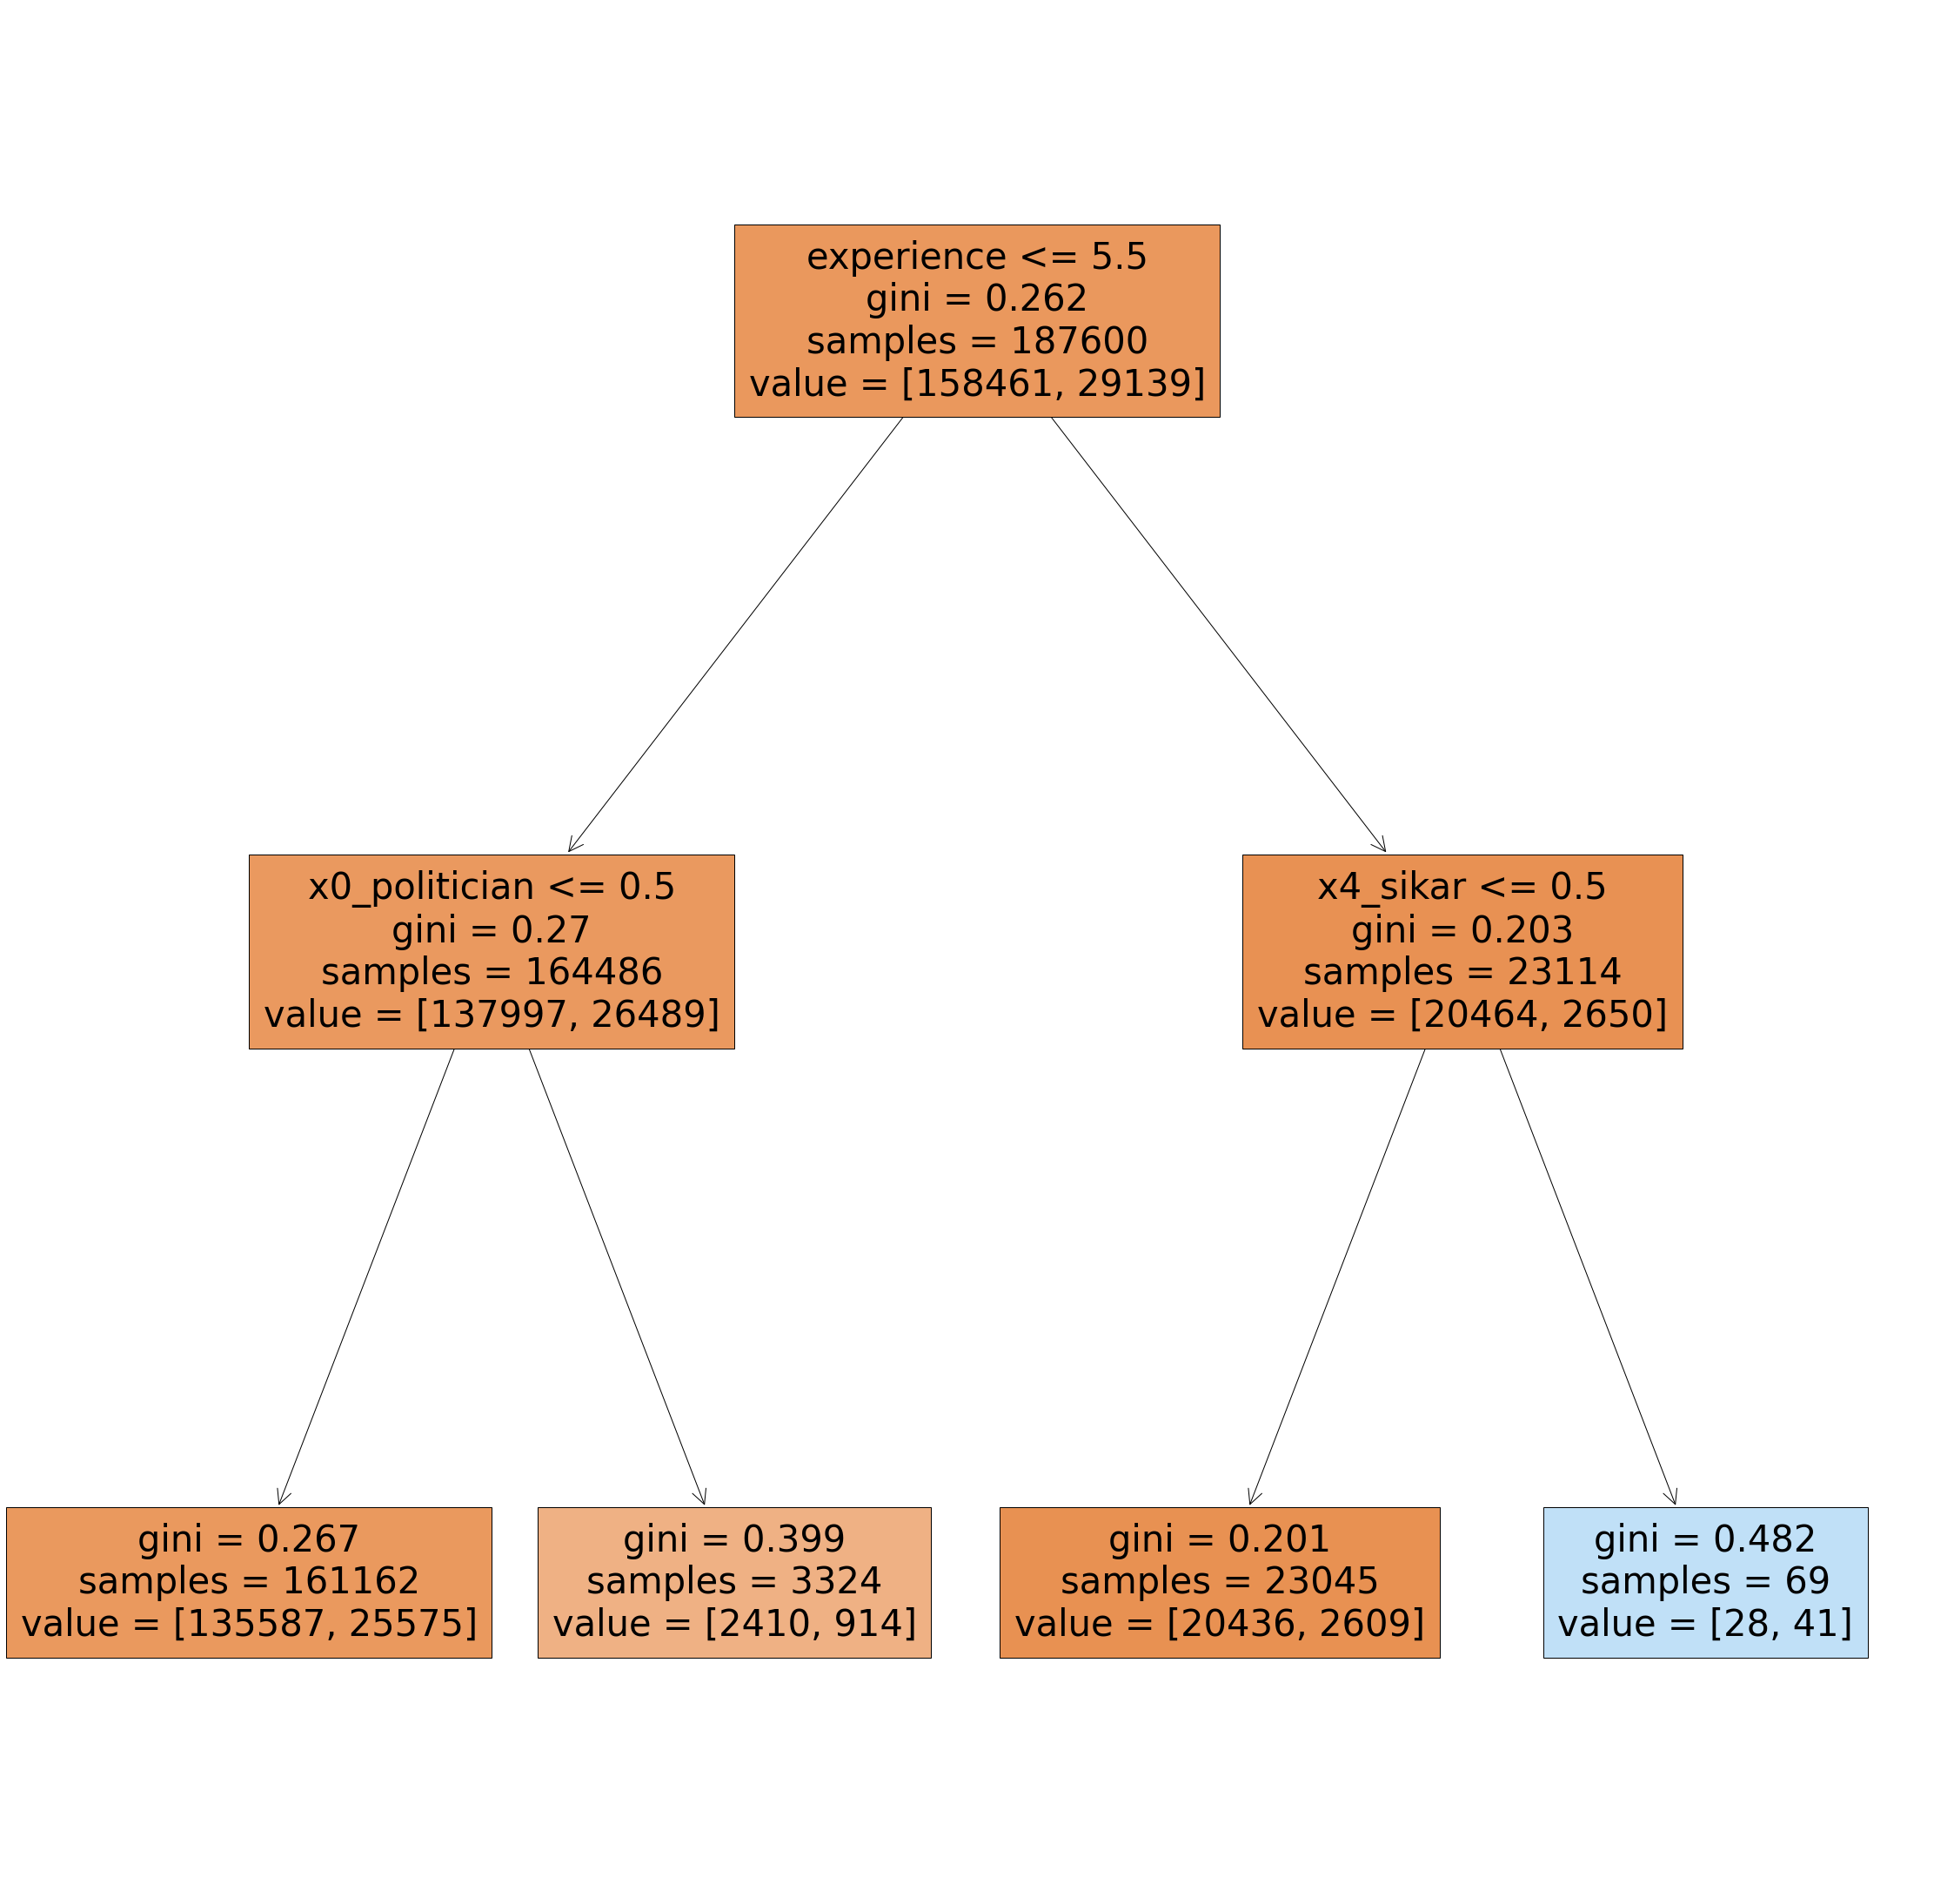

In [ ]:
fig = plt.figure(figsize=(40,40))
_=tree.plot_tree(DT,feature_names=sel_cols,  
                   
                   filled=True,max_depth=3)

fig.savefig("decistion_tree.png")

In [ ]:
auc1_te = auc1_scr("DT",df_all_test2,y_test1)
auc1_tr = auc1_scr("DT",df_all_train2,y_train1)

In [ ]:
auc1_te,auc1_tr

(0.5269550745170777, 0.5269921464088778)

In [ ]:
###Exercises

In [16]:
DT_5 = DecisionTreeClassifier(random_state=0,max_depth=50)
DT_5.fit(df_all_train2,y_train1)

auc1_te = auc1_scr("DT_5",df_all_test2,y_test1)
auc1_tr = auc1_scr("DT_5",df_all_train2,y_train1)

auc1_te,auc1_tr

DecisionTreeClassifier(max_depth=50, random_state=0)

(0.8187827807496674, 0.8778819895519709)

In [17]:
DT_100 = DecisionTreeClassifier(random_state=0,max_depth=100)
DT_100.fit(df_all_train2,y_train1)


auc1_te = auc1_scr("DT_100",df_all_test2,y_test1)
auc1_tr = auc1_scr("DT_100",df_all_train2,y_train1)
auc1_te,auc1_tr

DecisionTreeClassifier(max_depth=100, random_state=0)

(0.8828796536761143, 0.9857626055654225)

In [18]:
dt_grid= DecisionTreeClassifier(random_state=42)

params = {
    'max_depth': [2, 3,5],
    'min_samples_leaf': [20, 50, 100],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=dt_grid, 
                           param_grid=params, 
                           cv=2, n_jobs=-1, verbose=1, scoring = "accuracy")


grid_search.fit(df_all_train2,y_train1)


Fitting 2 folds for each of 18 candidates, totalling 36 fits


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5],
                         'min_samples_leaf': [20, 50, 100]},
             scoring='accuracy', verbose=1)

In [19]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,1.75023,0.01106,0.11671,0.00203,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.84468,0.84467,0.84467,0.00001,9
1,1.98441,0.02038,0.11445,0.00471,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.84468,0.84467,0.84467,0.00001,9
2,1.99353,0.01764,0.11155,0.00907,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.84468,0.84467,0.84467,0.00001,9
3,2.72808,0.01425,0.11451,0.00537,gini,3,20,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.84468,0.84489,0.84479,0.00011,7
4,2.74670,0.05385,0.11622,0.00696,gini,3,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.84468,0.84467,0.84467,0.00001,9


In [20]:
score_df.sort_values(["rank_test_score"]).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
15,3.69237,0.01453,0.12637,0.00074,entropy,5,20,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.84592,0.84538,0.84565,0.00027,1
6,4.16762,0.00596,0.12429,0.00221,gini,5,20,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.84568,0.84557,0.84562,0.00006,2
8,3.74229,0.01178,0.12945,0.00085,gini,5,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.84523,0.84511,0.84517,0.00006,3
16,3.74751,0.00305,0.12216,0.00462,entropy,5,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.84500,0.84527,0.84513,0.00013,4
17,4.12836,0.01334,0.10977,0.01794,entropy,5,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.84511,0.84510,0.84510,0.00001,5


In [21]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=20,
                       random_state=42)